# Visualising TS Data

In this notebook, we'll perform a visual analysis of a single stock. The matplotlib package is one of the most popular in Python for plotting. Let's first get our imports figured out first, since we have a good number of them now!

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Now we can load the dataset, from a file called `GME_WSB.csv`. This data covers a particularly exciting two-year period for GameStop, a chain of video game retail stores.

In [3]:
df = pd.read_csv("data/GME_WSB.csv")
df["Date"] = pd.to_datetime(df["Date"])
df = df.set_index("Date").sort_index().drop_duplicates()
df.head()
df.tail()

,Open,High,Low,Close,Volume
Date,,,,,
2022-06-23,35.410000,35.997501,34.182499,35.505001,6682800
2022-06-24,35.750000,37.092499,32.882500,33.802502,16995600
2022-06-27,34.117500,34.262501,31.825001,32.422501,9745600
2022-06-28,32.752499,32.832500,30.570000,31.094999,6610000
2022-06-29,30.387501,31.622499,29.897499,30.715000,6826400


Let's create our first simple plot. We'll use the `plot()` function to do this.

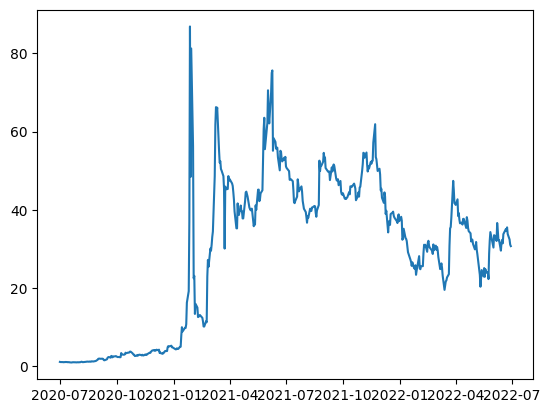

In [4]:
plt.plot(df.Close)

That was easy, but its not very readable, or attractive. Let's try again.

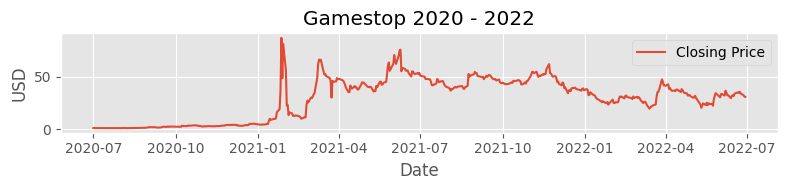

In [5]:
plt.style.use("ggplot")

plt.figure(figsize=(8, 2))
plt.title("Gamestop 2020 - 2022")
plt.ylabel("USD")
plt.xlabel("Date")

plt.plot(df.Close, label="Closing Price")
plt.legend()
plt.tight_layout()

One of the most commonly plotted technical indicators is Bollinger Bands. They consist of two lines:

- an upper band 2 standard deviations above the 20-day SMA
- a lower band 2 standard deviations below the 20-day SMA

When the bands are close, volatility is low. When they are far apart volatility is high. When the price is near the upper band the security may be overbought (ready for a decline), and when the price is near the lower band, the security may be oversold (ready for a jump).

In [6]:
# Adding these as features so the calculation of the Bollinger Bands is easier
df['SMA'] = df['Close'].rolling(window=20).mean()
df['Dev'] = df['Close'].rolling(window=20).std()

# Using the above features to calculate the bands
df['HighBand'] = df['SMA'] + 2 * df['Dev']
df['LowBand'] = df['SMA']  - 2 * df['Dev']

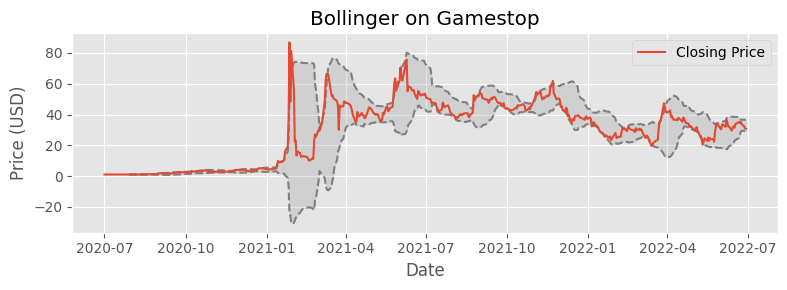

In [7]:
plt.figure(figsize=(8,3))
plt.title("Bollinger on Gamestop")
plt.xlabel("Date")
plt.ylabel("Price (USD)")

plt.plot(df.HighBand, color="grey", linestyle="--")
plt.plot(df.LowBand, color="grey", linestyle="--")

plt.fill_between(df.index, df.HighBand, df.LowBand, color="grey", alpha=0.2)

plt.plot(df.Close, label="Closing Price")

plt.legend()
plt.tight_layout()

### Exercise: High Highs

Remember price surges from our first day? Here we'll do something similar. Let's create a plot for `High` prices that helps visualise the highest highs across the entire period.

- Define a price surge threshold as two standard deviations from the mean High for the period.
- Plot both the high price over the period as well as the price surge threshold line.
- Give the plot a fitting title, labels and a legend.

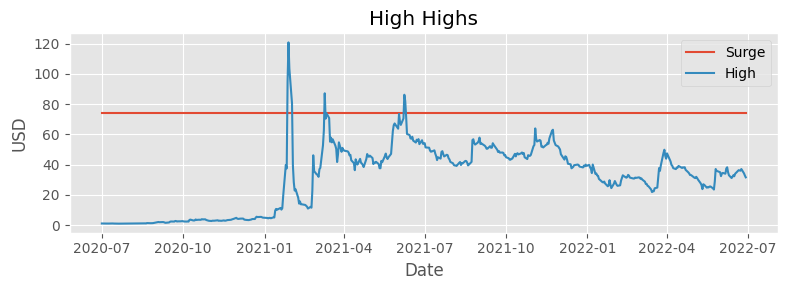

In [ ]:
df["Threshold"] = df.High.mean() + 2 * df.High.std()

plt.figure(figsize=(8,3))
plt.title("High Highs")
plt.xlabel("Date")
plt.ylabel("USD")
plt.plot(df.Threshold, label="Surge")
plt.plot(df.High, label="High")
plt.legend()
plt.tight_layout()


## Other common plots

Histograms show frequency distribution, or how often each value in the data occurs. They are a great way of visualising the distribution of returns in a financial data set. A histogram's tails (the sections that stretch away from the centre) offer one view of the risk of an asset. Heavy (tall) tails indicate extreme values, and long tails can indicate skew (positive skew when the tail is long to the right, and negative for long tails to the left).

For a histogram centered around zero, a negatively skewed distribution of returns can suggest that very large losses may occur. A positively skewed distribution implies the opposite - that gains can occasionally be very large. 

Scatterplots can help us visualise the relationships between two variables. They are also excellent at visualising outliers.

## Subplots

There are times when one plot just isn't enough. In this case we can create a subplot, and then plot on its axes. This generally calls for a different approach to Matplotlib, so watch carefully!

### Matplotlib Interfaces

Prior to our subplots example, you'll notice we used `plt` to do every part of our plotting. Developers often refer to this as using the **Pyplot interface** to Matplotlib. Matplotlib also exposes a so-called **object-oriented interface**, which can be seen in the subplots example above. Using this interface involves creating the figure and axes, and then using those objects to build our plot(s).

Best practice suggests that developers should always use the object-oriented Matplotlib, even for the most basic plots.

### Advanced: Candlestick Plots

If you have OHLC data, you can use `mplfinance`. It offers yet another interface to Matplotlib (in fact, it was once part of the Matplotlib package).